## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# TO DO 
INTERPRETATION OF MODEL SUMMARY & VALIDATION GRAPHS

# Exploratory Data Analysis

Step 1: Import and read data
<br> Step 2: Check datatypes
<br> Step 3: Check duplicates
<br> Step 4: Check nulls/missing values
<br> Step 5: Check outliers



**Step 1: Import and read data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data_folder/kc_house_data.csv', index_col = 0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


**Step 2: Check datatypes**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

Strangely, bathrooms is a float and `sqft_basement` is an object...

In [4]:
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

In [5]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
176.0         1
2570.0        1
2580.0        1
518.0         1
862.0         1
Name: sqft_basement, Length: 304, dtype: int64

We will have to fix the `?` value.

**Step 3: Check duplicates**

In [6]:
data.duplicated().sum()

0

No duplicates.

**Step 4: Check nulls/missing values**

In [7]:
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We will have to take a deeper look into `waterfront`, `yr_renovated`, and `view` to handle the nulls

In [8]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

There aren't enough homes with waterfront views to justify continuing to evaluate this variable as a predictor. 


**Step 5: Check outliers**

In [9]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


All of the `sqft_` variables seem to have outliers we want to handle. As well, `bedrooms` has high outlier of 33. 

In [10]:
data[(data['bedrooms']==33)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


Check distribution (boxplots) of `continuous_features` (`sqft_` variables and `bedrooms`)

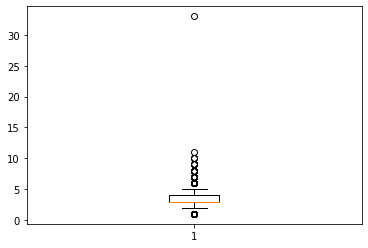

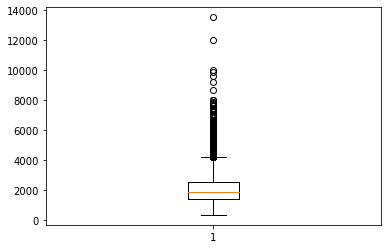

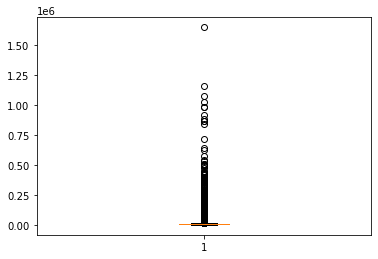

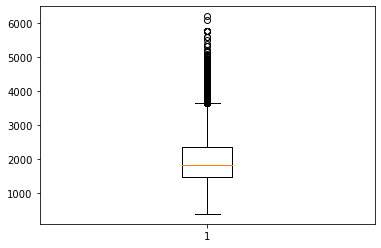

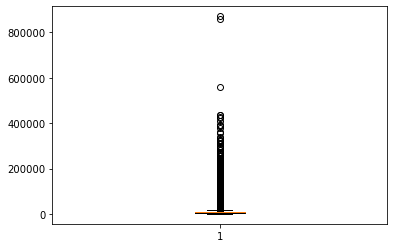

In [11]:
outliers = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']

for outlier in outliers:
    plt.figure()
    plt.boxplot(data[outlier])

# Data Cleaning

Step 1: Fix structural errors (bathroom and sqft_basement values) 
<br> Step 2: Handle missing data 
<br> Step 3: Filter unwanted outliers
<br> Step 4: Modify and/or remove irrelevant observations

**Step 1: Fix structural errors (bathroom and sqft_basement values)**

In [12]:
data['bathrooms']=round(data['bathrooms']*2)/2
data['bathrooms'].value_counts()

2.0    7025
2.5    5377
1.0    3931
3.0    2527
1.5    1445
3.5     731
4.0     370
4.5     100
5.0      57
6.0      12
5.5      10
0.5       4
8.0       3
7.0       2
6.5       2
7.5       1
Name: bathrooms, dtype: int64

In [13]:
data = data[data.sqft_basement != '?']
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1816.0        1
2720.0        1
1008.0        1
2250.0        1
2240.0        1
Name: sqft_basement, Length: 303, dtype: int64

**Step 2: Handle missing data**

In [14]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)

**Step 3: Filter unwanted outliers**

Define upper and lower limits as 3 standard deviations away from the mean 

In [15]:
def lower_limit(col):
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit


def upper_limit(col):
    upper_limit = np.mean(col)+3*np.std(col)
    return upper_limit


Removing outliers from continuous `sqft` variables


In [16]:
data = data[(data['sqft_living'] >= lower_limit(data['sqft_living'])) 
            & (data['sqft_living'] <= upper_limit(data['sqft_living']))]


In [17]:
data = data[(data['sqft_lot'] >= lower_limit(data['sqft_lot'])) 
            & (data['sqft_lot'] <= upper_limit(data['sqft_lot']))]

In [18]:

data = data[(data['sqft_living15'] >= lower_limit(data['sqft_living15'])) 
            & (data['sqft_living15'] <= upper_limit(data['sqft_living15']))]

In [19]:
data = data[(data['sqft_lot15'] >= lower_limit(data['sqft_lot15'])) 
            & (data['sqft_lot15'] <= upper_limit(data['sqft_lot15']))]

Remove outlier from bedroom data 

In [20]:
data = data[(data['bedrooms']!=33)]

In [21]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.013100e+04,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,17898.000000,20075.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000
mean,5.149142e+05,3.351249,2.096990,2004.862699,9812.499131,1.484973,0.006090,0.207073,3.415081,7.584770,1724.094779,280.767920,1970.377428,68.119169,98079.398838,47.561887,-122.220609,1935.779147,8945.089265
std,3.007539e+05,0.891515,0.719154,791.707318,10592.249126,0.539830,0.077803,0.718817,0.652390,1.081711,731.997899,419.546462,29.403734,362.416752,53.839269,0.138149,0.135915,617.109881,7602.766529
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,3.180000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.474300,-122.331000,1470.000000,5001.000000
50%,4.445000e+05,3.000000,2.000000,1880.000000,7462.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1973.000000,0.000000,98072.000000,47.574000,-122.242000,1810.000000,7500.000000
75%,6.250000e+05,4.000000,2.500000,2480.000000,10067.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,550.000000,1996.000000,0.000000,98118.000000,47.679500,-122.137000,2310.000000,9705.000000
max,3.640000e+06,11.000000,7.500000,4830.000000,130680.000000,3.500000,1.000000,4.000000,5.000000,12.000000,4830.000000,2300.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3930.000000,56827.000000


The unwanted outliers have been removed.

**Step 4: Modify and/or remove irrelevant observations**

Turn `basement` and `yr_renovated` variables into boolean `has_basement and `is_renovated`. 

In [22]:
data['has_basement']= np.where(data['sqft_basement']!= 0, True, False)
data['is_renovated']= np.where(data['yr_renovated']!= 0, True, False)

Use `date` to get `season` column

In [23]:
data['date'] = pd.to_datetime(data['date'])
data['month']= data['date'].dt.month
data = data.assign(season=lambda x: x["date"].apply(lambda s: ["winter","spring","summer","fall"][(s.month-1)//3]))
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,is_renovated,month,season
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,3,...,0.0,98178,47.5112,-122.257,1340,5650,False,False,10,fall
6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,3,...,1991.0,98125,47.7210,-122.319,1690,7639,True,True,12,fall
5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,...,0.0,98028,47.7379,-122.233,2720,8062,False,False,2,winter
2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,5,...,0.0,98136,47.5208,-122.393,1360,5000,True,False,12,fall
1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,3,...,0.0,98074,47.6168,-122.045,1800,7503,False,False,2,winter


Drop variables that will not be part of the model

In [24]:
data.drop(['waterfront','view', 'sqft_above', 'zipcode','month', 'yr_renovated','sqft_basement'], axis=1, inplace=True)

# Post-cleaning exploratory data analysis

Look at the correlations of each columns with price.

In [25]:
price_corrs = data.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.646800
grade            0.643538
sqft_living15    0.559596
bathrooms        0.460189
lat              0.363181
bedrooms         0.294626
floors           0.252868
has_basement     0.180632
is_renovated     0.126962
sqft_lot15       0.121899
sqft_lot         0.114814
condition        0.057957
yr_built         0.022790
long             0.003159
Name: price, dtype: float64

Create a heat map to identify correlation between variables to look for issues with multicollinearity.

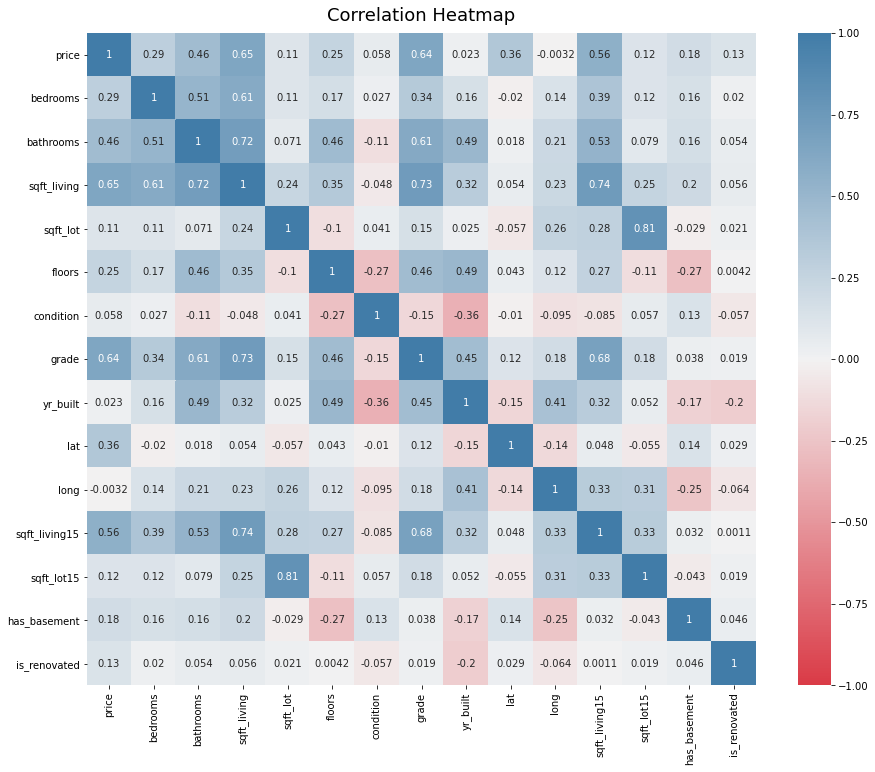

In [26]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Drop the `sqft_living15` and `sqft_lot15` as they are highly correlated with `sqft_living` and `sqft_lot`.

In [27]:
data.drop(labels = ['sqft_living15','sqft_lot15'], axis=1, inplace=True)


**Check distribution of discrete variables**

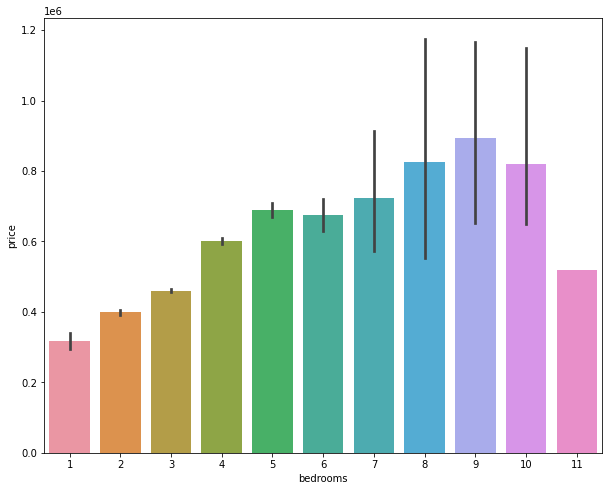

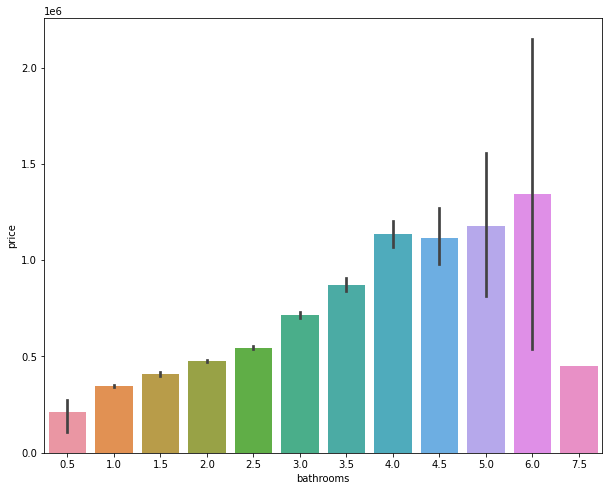

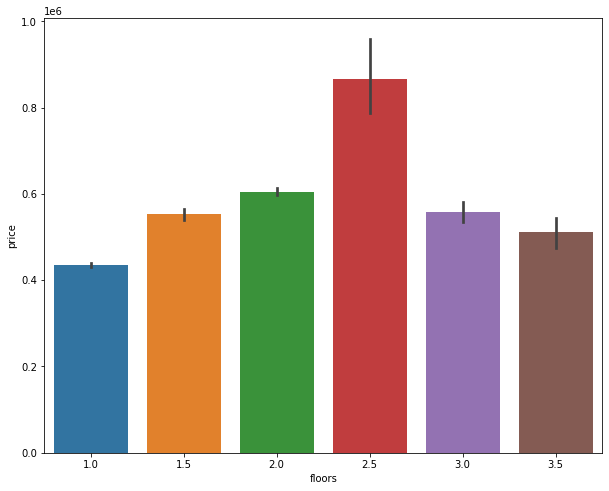

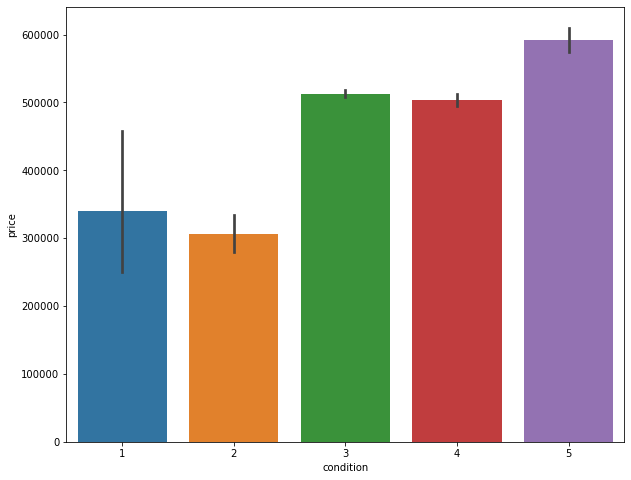

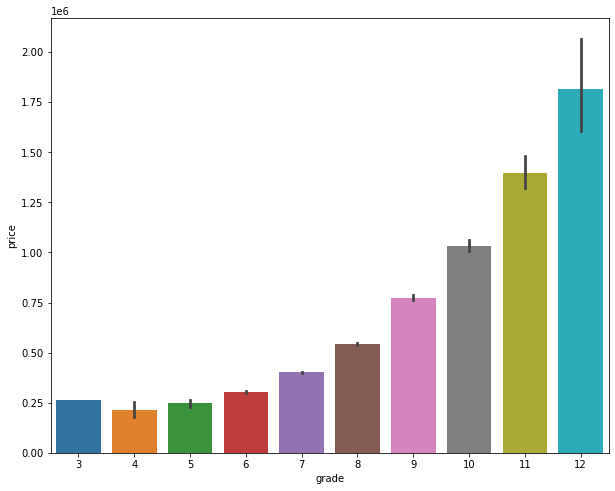

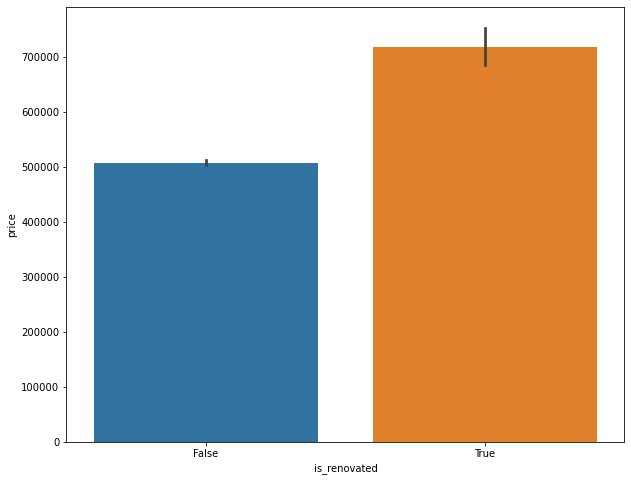

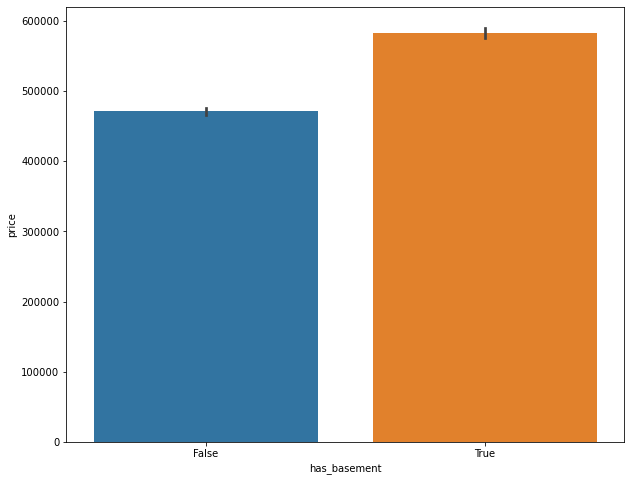

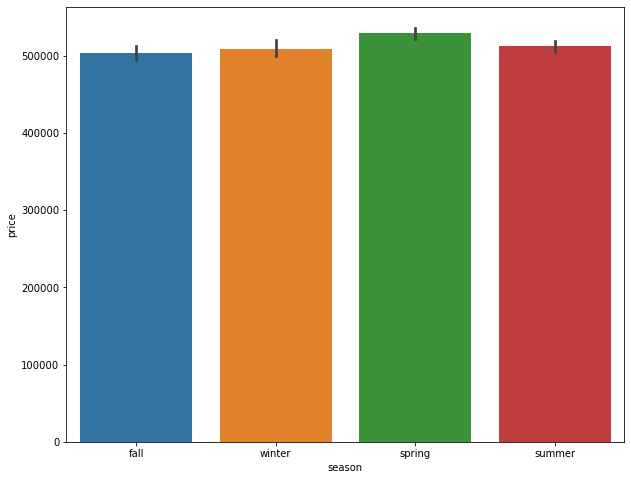

In [28]:
discrete_features = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'is_renovated','has_basement', 'season']

for feature in discrete_features:
    plt.figure(figsize=(10,8))
    sns.barplot(x=feature, y='price', data=data)

Drop `season` since price doesn't really change between seasons. 

In [29]:
data.drop('season', axis=1, inplace=True)

# Preprocessing

**Create dummy variables**

In [30]:
dummy = pd.get_dummies(data, columns=['is_renovated', 'has_basement'], drop_first=True)
dummy.drop(labels=['date'], axis=1, inplace=True)
dummy

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,is_renovated_True,has_basement_True
id,,,,,,,,,,,,,
7129300520,221900.0,3,1.0,1180,5650,1.0,3,7,1955,47.5112,-122.257,0,0
6414100192,538000.0,3,2.0,2570,7242,2.0,3,7,1951,47.7210,-122.319,1,1
5631500400,180000.0,2,1.0,770,10000,1.0,3,6,1933,47.7379,-122.233,0,0
2487200875,604000.0,4,3.0,1960,5000,1.0,5,7,1965,47.5208,-122.393,0,1
1954400510,510000.0,3,2.0,1680,8080,1.0,3,8,1987,47.6168,-122.045,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.5,1530,1131,3.0,3,8,2009,47.6993,-122.346,0,0
6600060120,400000.0,4,2.5,2310,5813,2.0,3,8,2014,47.5107,-122.362,0,0
1523300141,402101.0,2,1.0,1020,1350,2.0,3,7,2009,47.5944,-122.299,0,0


**Train-Test Split**

In [31]:
y = dummy['price']
X = dummy.drop(['price'], axis=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(len(X_train), len(X_test), len(y_train), len(y_test))


16104 4027 16104 4027


# Modeling

Regression 1 : Standardized Variablies
<br>  - standardize variables and check distribution
<br>  - model and interpret summary
<br>  - Model Validation : compare training and test MSE
<br>  - Model Validation : Test normality (QQ Plot)

<br>Regression 2 : Using Log-Scaled & Standardized Variables 
<br>  - log variables, standardize variables, and check distribution
<br>  - model and interpret summary
<br>  - Model Validation : compare training and test MSE
<br>  - Model Validation : Test normality and heterskedacity (QQ Plot and regression against one regressor)

<br>Regression 3 : Recursive Feature Elimination
<br>  - Use RFE to eliminate "useless" estimators and fit model to new equation
<br>  - model and interpret summary
<br>  - Model Validation : compare training and test MSE
<br>  - Model Validation : Test normality and heterskedacity (QQ Plot and regression against one regressor)

**Regression 1: Standardized Variablies**

Standardize training variables

In [34]:
X_train_scaled = (X_train - np.mean(X_train))/ np.std(X_train)
y_train_scaled = (y_train - np.mean(y_train))/ np.std(y_train)

Distribution after scaling. This will lead to a fairer comparison of the correlation coefficients.

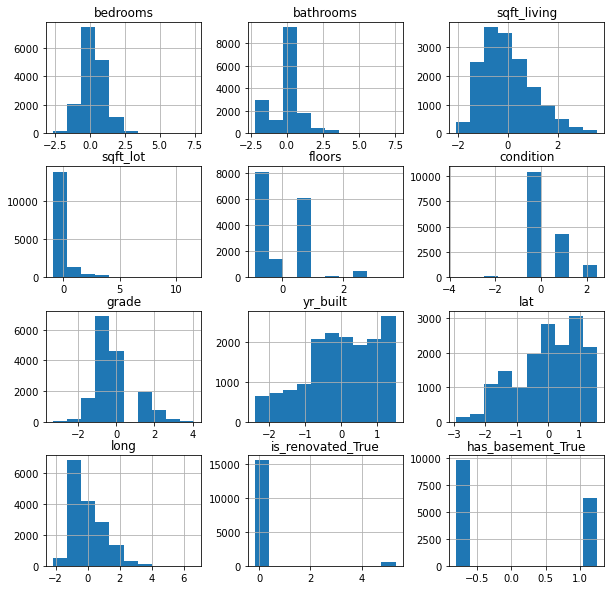

In [35]:
X_train_scaled.hist(figsize=[10,10]);


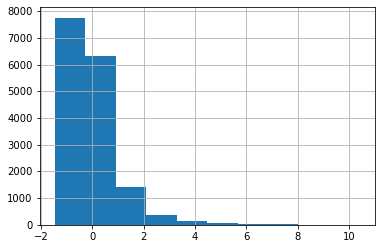

In [36]:
y_train_scaled.hist(figsize=[6,4]);

In [37]:
pred = sm.add_constant(X_train_scaled)
model = sm.OLS(endog=y_train_scaled, exog=pred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     2369.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        07:36:52   Log-Likelihood:                -14656.
No. Observations:               16104   AIC:                         2.934e+04
Df Residuals:                   16091   BIC:                         2.944e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.478e-13      0.005   3.12e-11      1.000      -0.009       0.009
bedrooms             -0.0959      0.006    -15.453      0.000      -0.108      -0.084
bathrooms             0.0775      0.008      9.691      0.000       0.062       0.093
sqft_living           0.4254      0.009     44.830      0.000       0.407       0.444
sqft_lot             -0.0145      0.005     -2.792      0.005      -0.025      -0.004
floors                0.0336      0.006      5.212      0.000       0.021       0.046
condition             0.0723      0.005     13.828      0.000       0.062       0.083
grade                 0.4017      0.008     51.587      0.000       0.386       0.417
yr_built             -0.2459      0.007    -34.188      0.000      -0.260      -0.232
lat                   0.2471      0.005     49.373      0.000       0.237       0.257
long                 -0.0331      0.006     -5.864      0.000      -0.044      -0.022
is_renovated_True     0.0366      0.005      7.337      0.000       0.027       0.046
has_basement_True    -0.0076      0.006     -1.334      0.182      -0.019       0.004
==============================================================================
Omnibus:                     9992.609   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211936.414
Skew:                           2.613   Prob(JB):                         0.00
Kurtosis:                      19.987   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
reg = LinearRegression().fit(X_train_scaled, y_train_scaled)
reg.score(X_train_scaled, y_train_scaled)

0.638573517741792

Standardize the X and Y test variables

In [39]:
X_test_scaled = (X_test - np.mean(X_test))/ np.std(X_test)
y_test_scaled = (y_test - np.mean(y_test))/ np.std(y_test)


Calculated the train and test mean squared error for comparison

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train_scaled)

y_hat_scaled_train = linreg.predict(X_train_scaled)
y_hat_scaled_test = linreg.predict(X_test_scaled)

train_scaled_mse = mean_squared_error(y_train_scaled, y_hat_scaled_train)
test_scaled_mse = mean_squared_error(y_test_scaled, y_hat_scaled_test)
print('Train Mean Squared Error:', train_scaled_mse)
print('Test Mean Squared Error:', test_scaled_mse)

Train Mean Squared Error: 0.36142648225820767
Test Mean Squared Error: 0.3523537252805156


QQ Plot of residuals:

<ipython-input-41-8c4a1944e451>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


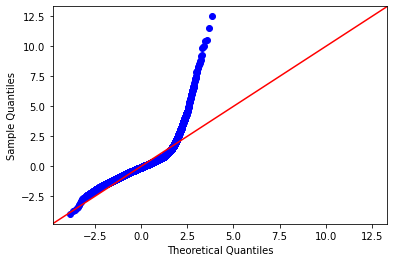

In [41]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

**Regression #2 : Using Log-Scaled & Standardized Variables**

Copy X_train from the preprocessing stage

In [42]:
X_train_log = pd.DataFrame.copy(X_train)


Drop`lat` and `long` since `long` already had an extremely low coefficient in iteration 1 (above), and was dropped during our previous attempt at the recursive feature selection (iteration 3 below). 

In [43]:
X_train_log.drop(['lat','long'], axis=1, inplace=True)

Identify the continuous variables we want to log, and apply it to the training data, while leaving the discrete variable unchanged 

In [44]:
log_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']
for col in X_train.columns:
    if col in log_col:
        new_log = np.log(X_train_log[col])
        X_train_log[col] = new_log

In [45]:
y_train_log = np.log(y_train)

Standardize the X and Y training variables

In [46]:
X_train_log_scaled = (X_train_log - np.mean(X_train_log))/ np.std(X_train_log)
y_train_log_scaled = (y_train_log - np.mean(y_train_log))/ np.std(y_train_log)

Distribution of continuous variables look much better in comparison to iteration 1

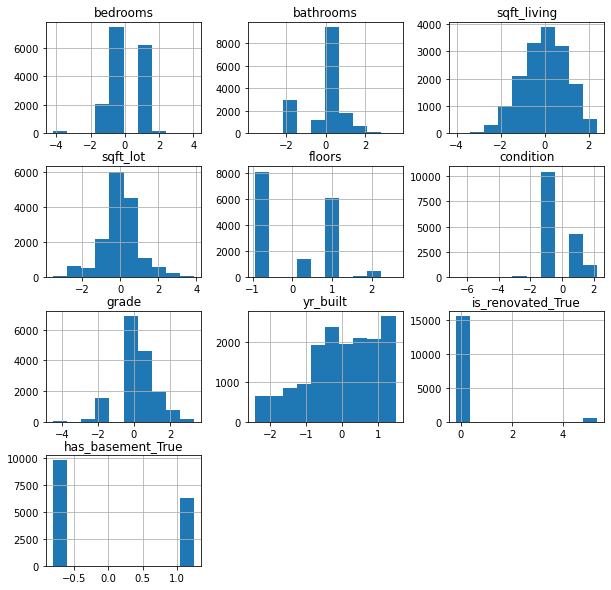

In [47]:
X_train_log_scaled.hist(figsize=[10,10]);

Distribution of dependent variable price also looks much better in comparison to iteration 1

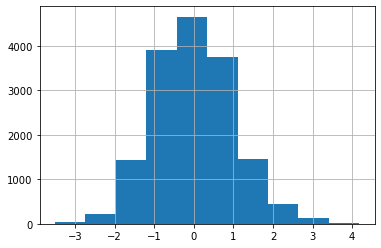

In [48]:
y_train_log_scaled.hist(figsize=[6,4]);

In [49]:
pred2 = sm.add_constant(X_train_log_scaled)
model2 = sm.OLS(endog=y_train_log_scaled, exog=pred2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     2376.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        07:36:53   Log-Likelihood:                -15548.
No. Observations:               16104   AIC:                         3.112e+04
Df Residuals:                   16093   BIC:                         3.120e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.365e-12      0.005  -4.72e-10      1.000      -0.010       0.010
bedrooms             -0.1060      0.007    -15.655      0.000      -0.119      -0.093
bathrooms             0.0743      0.009      8.622      0.000       0.057       0.091
sqft_living           0.3871      0.011     35.042      0.000       0.365       0.409
sqft_lot             -0.0759      0.006    -11.742      0.000      -0.089      -0.063
floors                0.0711      0.008      9.359      0.000       0.056       0.086
condition             0.0510      0.005      9.303      0.000       0.040       0.062
grade                 0.5114      0.008     65.035      0.000       0.496       0.527
yr_built             -0.3438      0.007    -49.131      0.000      -0.357      -0.330
is_renovated_True     0.0112      0.005      2.135      0.033       0.001       0.022
has_basement_True     0.0449      0.006      7.193      0.000       0.033       0.057
==============================================================================
Omnibus:                      122.785   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.108
Skew:                           0.072   Prob(JB):                     7.76e-40
Kurtosis:                       3.498   Cond. No.                         4.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X_test_log = pd.DataFrame.copy(X_test)

X_test_log.drop(['lat','long'], axis=1, inplace=True)

log_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']
for col in X_test.columns:
    if col in log_col:
        new_log = np.log(X_test_log[col])
        X_test_log[col] = new_log
        
y_test_log = np.log(y_test)

X_test_log_scaled = (X_test_log - np.mean(X_test_log))/ np.std(X_test_log)
y_test_log_scaled = (y_test_log - np.mean(y_test_log))/ np.std(y_test_log)


Calculated the train and test mean squared error for comparison

In [51]:
linreg = LinearRegression()
linreg.fit(X_train_log_scaled, y_train_log_scaled)

y_hat_log_scaled_train = linreg.predict(X_train_log_scaled)
y_hat_log_scaled_test = linreg.predict(X_test_log_scaled)

train_log_scaled_mse = mean_squared_error(y_train_log_scaled, y_hat_log_scaled_train)
test_log_scaled_mse = mean_squared_error(y_test_log_scaled, y_hat_log_scaled_test)
print('Train Mean Squarred Error:', train_log_scaled_mse)
print('Test Mean Squarred Error:', test_log_scaled_mse)

Train Mean Squarred Error: 0.40378178743533444
Test Mean Squarred Error: 0.38584014697876856


QQ Plot of residuals:

<ipython-input-52-e51042142ea7>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


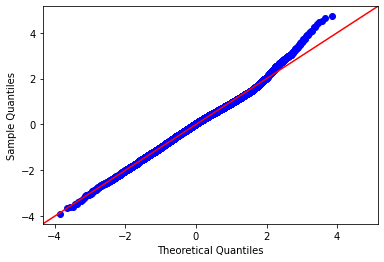

In [52]:
import scipy.stats as stats
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Plot regression results against one regressor:

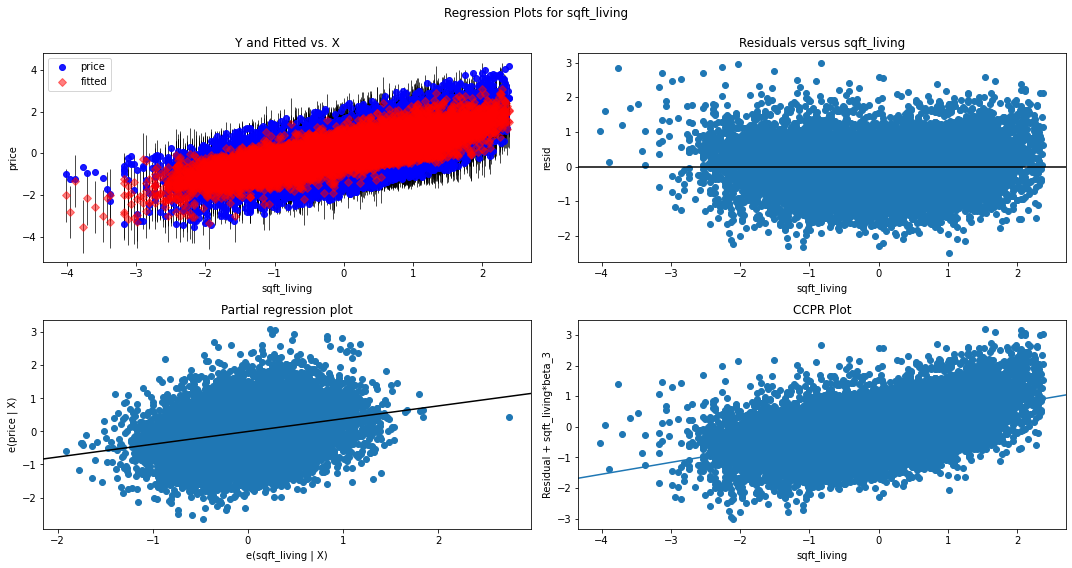

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "sqft_living", fig=fig)
plt.show()

**Regression #3 : Recursive Feature Elimination**

Use RFE to eliminate "useless" estimators and fit model to new equation

In [54]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(pred2, y_train_log_scaled)

In [55]:
selector.support_


array([False,  True, False,  True,  True, False, False,  True,  True,
       False, False])

In [56]:
pred2.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'is_renovated_True',
       'has_basement_True'],
      dtype='object')

In [57]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[-0.09793213  0.4771437  -0.11933507  0.52042785 -0.33792747]
-2.3837282834630664e-12


In [58]:
pred2_columns = list(pred2.columns)
tf = list(selector.support_)
filtered = np.array(pred2_columns)[np.array(tf)]
filtered
pred3 = pred2[filtered]
pred3

,bedrooms,sqft_living,sqft_lot,grade,yr_built
id,,,,,
1937300280,-1.717735,-0.945575,-0.899363,-0.506242,-2.118283
3856901435,0.761269,-0.132643,-0.637387,-0.506242,-2.223415
2071700010,-0.267611,0.820253,0.034448,-0.506242,-0.253642
2254501335,-0.267611,-0.598227,-0.936032,-0.506242,-2.363849
7129300175,0.761269,-0.401436,0.209848,-0.506242,-1.456258
...,...,...,...,...,...
7972604355,-0.267611,-1.491723,0.111406,-0.506242,-0.492440
9274203036,-0.267611,1.154138,-0.653545,1.283340,1.028016
1954440050,0.761269,0.247359,0.242298,0.444620,0.558680


In [59]:
pred3 = sm.add_constant(pred3)
model3 = sm.OLS(endog=y_train_log_scaled, exog=pred3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     4608.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        07:36:54   Log-Likelihood:                -15697.
No. Observations:               16104   AIC:                         3.141e+04
Df Residuals:                   16098   BIC:                         3.145e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.384e-12      0.005  -4.72e-10      1.000      -0.010       0.010
bedrooms       -0.0979      0.007    -14.502      0.000      -0.111      -0.085
sqft_living     0.4771      0.009     51.753      0.000       0.459       0.495
sqft_lot       -0.1193      0.005    -22.031      0.000      -0.130      -0.109
grade           0.5204      0.008     66.652      0.000       0.505       0.536
yr_built       -0.3379      0.006    -58.748      0.000      -0.349      -0.327
==============================================================================
Omnibus:                      110.961   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.685
Skew:                           0.043   Prob(JB):                     1.05e-36
Kurtosis:                       3.489   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X_test_filtered = X_test_log_scaled[filtered]
X_test_filtered

X_train_filtered = X_train_log_scaled[filtered]
X_train_filtered

,bedrooms,sqft_living,sqft_lot,grade,yr_built
id,,,,,
1937300280,-1.717735,-0.945575,-0.899363,-0.506242,-2.118283
3856901435,0.761269,-0.132643,-0.637387,-0.506242,-2.223415
2071700010,-0.267611,0.820253,0.034448,-0.506242,-0.253642
2254501335,-0.267611,-0.598227,-0.936032,-0.506242,-2.363849
7129300175,0.761269,-0.401436,0.209848,-0.506242,-1.456258
...,...,...,...,...,...
7972604355,-0.267611,-1.491723,0.111406,-0.506242,-0.492440
9274203036,-0.267611,1.154138,-0.653545,1.283340,1.028016
1954440050,0.761269,0.247359,0.242298,0.444620,0.558680


Calculated the train and test mean squared error for comparison

In [61]:
linreg = LinearRegression()
linreg.fit(X_train_filtered, y_train_log_scaled)

y_hat_log_scaled_train = linreg.predict(X_train_filtered)
y_hat_log_scaled_test = linreg.predict(X_test_filtered)



train_log_scaled_mse = mean_squared_error(y_train_log_scaled, y_hat_log_scaled_train)
test_log_scaled_mse = mean_squared_error(y_test_log_scaled, y_hat_log_scaled_test)
print('Train Mean Squarred Error:', train_log_scaled_mse)
print('Test Mean Squarred Error:', test_log_scaled_mse)

Train Mean Squarred Error: 0.41132799570365475
Test Mean Squarred Error: 0.3910882207875645


QQ Plot of residual:

<ipython-input-62-e566dfa41483>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


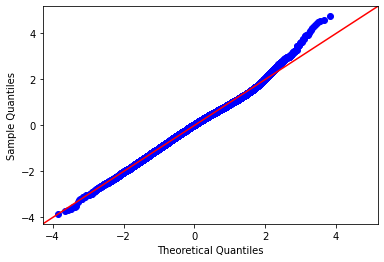

In [62]:
import scipy.stats as stats
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Plot regression results against one regressor:

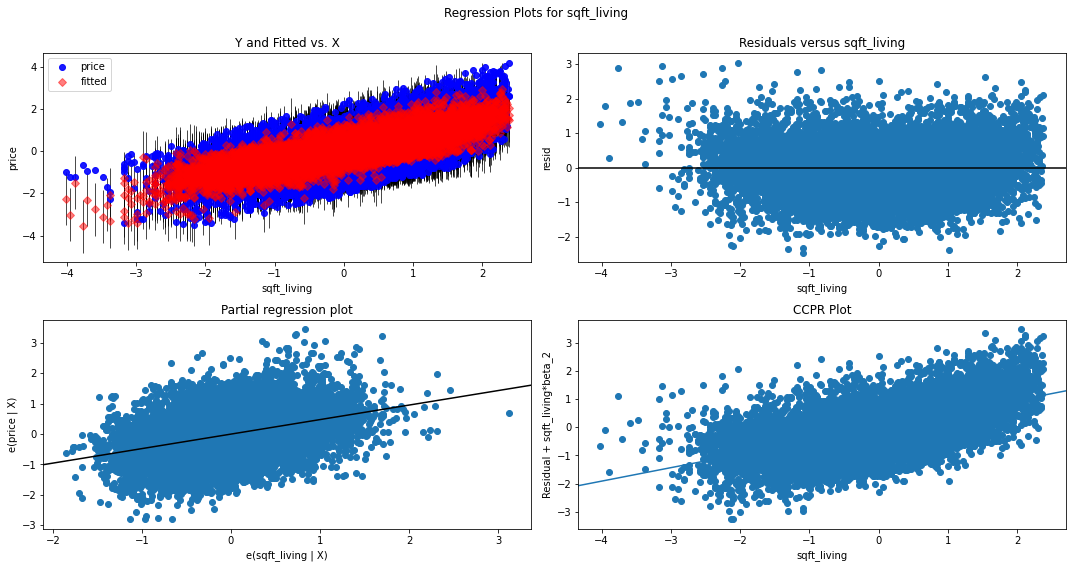

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "sqft_living", fig=fig)
plt.show()